In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras.datasets import reuters

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [17]:
# vectorize. Docs represented as a 10,000 dim vector
# each index corresponds to the number of words that map to that index value

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [26]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [27]:
# built in way to vectorize data
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [28]:
# define layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [29]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [31]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 40ms/step - loss: 2.6747 - accuracy: 0.5338 - val_loss: 1.8111 - val_accuracy: 0.6390
Epoch 2/20
16/16 [==============================] - 0s 17ms/step - loss: 1.4679 - accuracy: 0.7007 - val_loss: 1.3315 - val_accuracy: 0.7110
Epoch 3/20
16/16 [==============================] - 0s 20ms/step - loss: 1.0769 - accuracy: 0.7696 - val_loss: 1.1304 - val_accuracy: 0.7690
Epoch 4/20
16/16 [==============================] - 0s 19ms/step - loss: 0.8451 - accuracy: 0.8229 - val_loss: 1.0217 - val_accuracy: 0.7910
Epoch 5/20
16/16 [==============================] - 0s 20ms/step - loss: 0.6695 - accuracy: 0.8647 - val_loss: 0.9496 - val_accuracy: 0.8000
Epoch 6/20
16/16 [==============================] - 0s 20ms/step - loss: 0.5334 - accuracy: 0.8918 - val_loss: 0.9176 - val_accuracy: 0.8150
Epoch 7/20
16/16 [==============================] - 0s 19ms/step - loss: 0.4349 - accuracy: 0.9129 - val_loss: 0.8972 - val_accuracy: 0.8190
Epoch 8/20
16

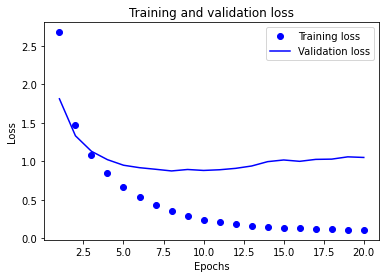

In [32]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

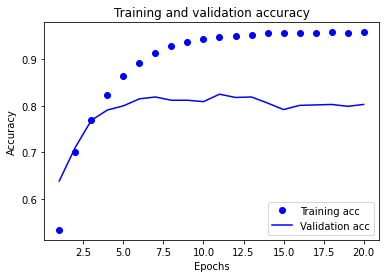

In [34]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [35]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 0s 27ms/step - loss: 2.5554 - accuracy: 0.5583 - val_loss: 1.6911 - val_accuracy: 0.6670
Epoch 2/9
16/16 [==============================] - 0s 20ms/step - loss: 1.3892 - accuracy: 0.7151 - val_loss: 1.2789 - val_accuracy: 0.7250
Epoch 3/9
16/16 [==============================] - 0s 21ms/step - loss: 1.0295 - accuracy: 0.7790 - val_loss: 1.1200 - val_accuracy: 0.7620
Epoch 4/9
16/16 [==============================] - 0s 22ms/step - loss: 0.8050 - accuracy: 0.8324 - val_loss: 1.0022 - val_accuracy: 0.7890
Epoch 5/9
16/16 [==============================] - 0s 24ms/step - loss: 0.6359 - accuracy: 0.8685 - val_loss: 0.9480 - val_accuracy: 0.8070
Epoch 6/9
16/16 [==============================] - 0s 21ms/step - loss: 0.5074 - accuracy: 0.8945 - val_loss: 0.9164 - val_accuracy: 0.8090
Epoch 7/9
16/16 [==============================] - 0s 22ms/step - loss: 0.4057 - accuracy: 0.9153 - val_loss: 0.8770 - val_accuracy: 0.8190
Epoch 8/9
16/16 [===

In [36]:
results

[0.9912742972373962, 0.7902938723564148]

In [ ]:
### if you encode the y labels as categorical variables as opposed to one hot encoding, 
# you have to use a different loss funcgtion

# from book
## This new loss function is still mathematically the same as categorical_crossentropy; 
## it just has a different interface.

In [ ]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [ ]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])